In [1]:
suppressPackageStartupMessages(library(ArchR))
suppressPackageStartupMessages(library(ArchRNA))
suppressPackageStartupMessages(library(parallel))   
suppressWarnings(addArchRGenome("hg19"))

Setting default genome to Hg19.



In [2]:
download.file("https://cf.10xgenomics.com/samples/cell-exp/4.0.0/Parent_NGSC3_DI_PBMC/Parent_NGSC3_DI_PBMC_filtered_feature_bc_matrix.h5", destfile = "pbmc10k_filt.h5")

In [3]:
proj <- suppressMessages(suppressWarnings(RnaArchRProject(c("pbmc10k_filt.h5"), c("pbmc"), "pbmc")))

In [4]:
proj <- suppressMessages(addRNAIterativeLSI(proj))

Warning message in if (grepl("log", units, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (units %in% "BinarizedCounts") {:
“the condition has length > 1 and only the first element will be used”


In [5]:
proj <- suppressMessages(addClusters(proj, reducedDims = "RNAIterativeLSI", biasCol = "Gex_nUMI"))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10194
Number of edges: 392238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8955
Number of communities: 20
Elapsed time: 1 seconds


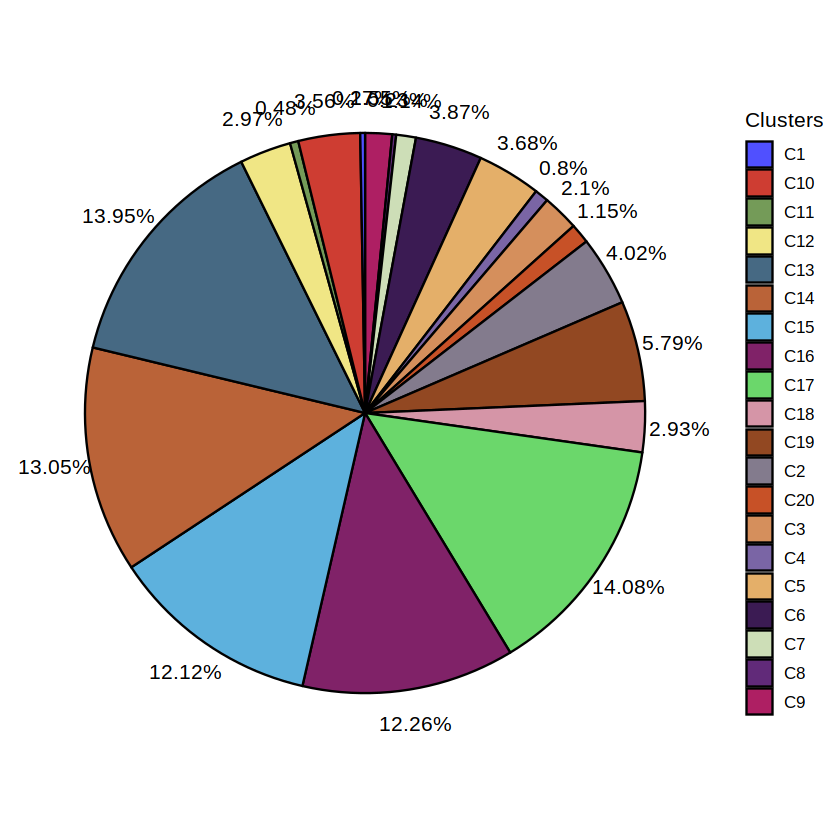

In [6]:
PiePlotS(proj, Cluster="Clusters")

In [7]:
proj <- suppressMessages(addUMAP(proj, reducedDims = "RNAIterativeLSI", verbose = F, force=T))

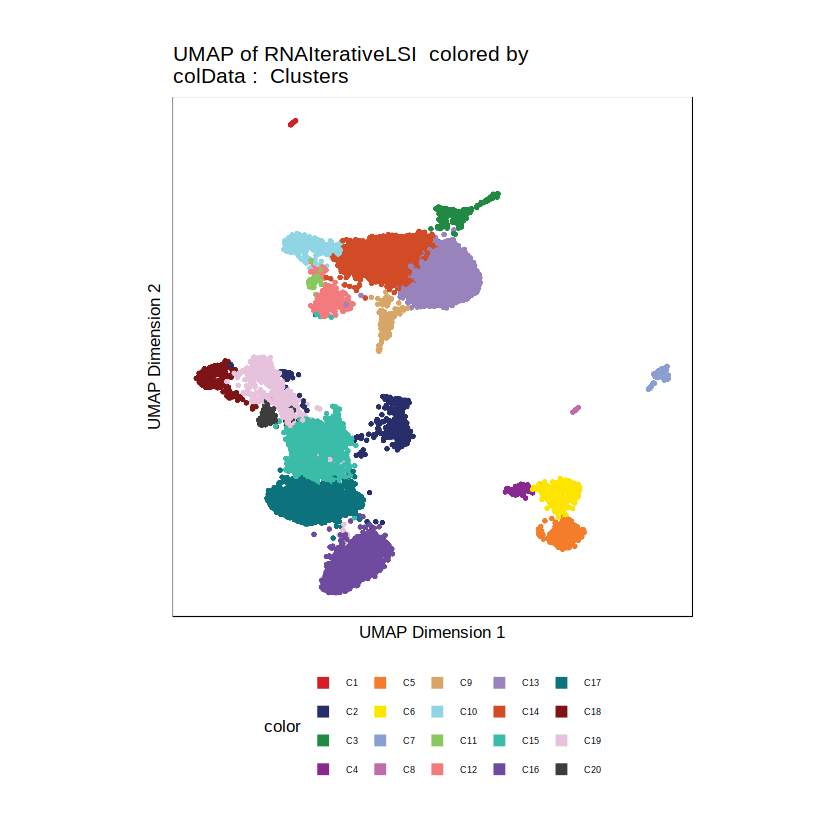

In [8]:
p1 <- suppressMessages(plotEmbedding(proj, name = "Clusters", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F))
p1 

Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay):
“”
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of SPINK1.”


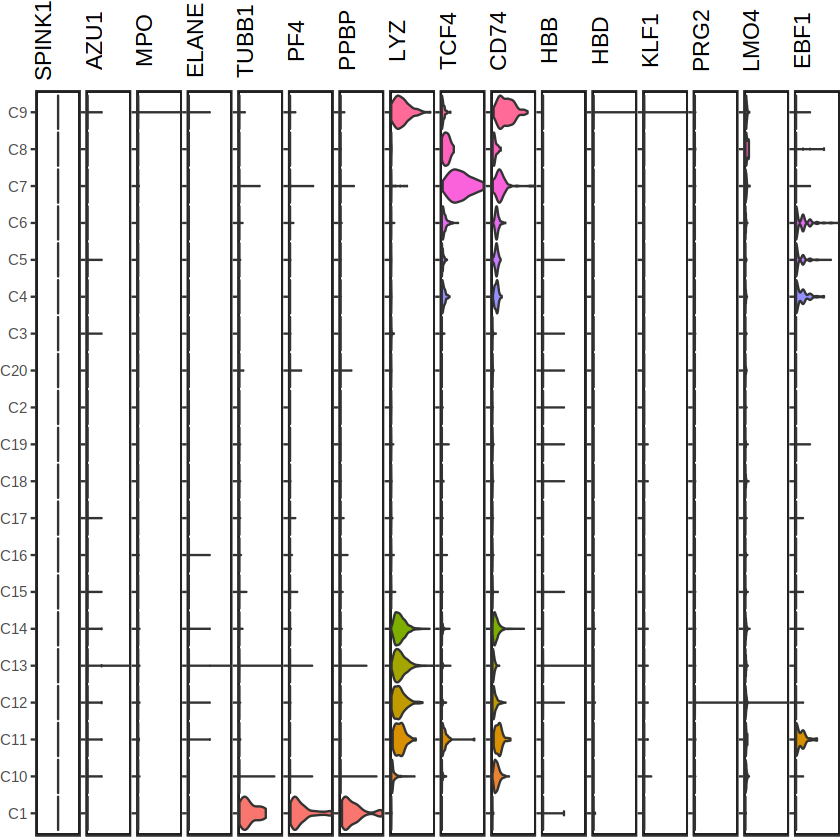

In [9]:
genes <- c("SPINK1", "AZU1", "MPO", "ELANE", "TUBB1", "PF4", "PPBP", "LYZ", "TCF4", "CD74", "HBB", "HBD", "KLF1", "PRG2", "LMO4", "EBF1")  
suppressMessages(VlnMatrixPlotS(proj, features = genes, Cluster="Clusters", leftmost_width = 1.6))

Warning message in DotPlotS(proj, features = genes, group.by = "Clusters"):
“useMatrix is NULL, use first matrix GeneExpressionMatrix!”
Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay):
“”


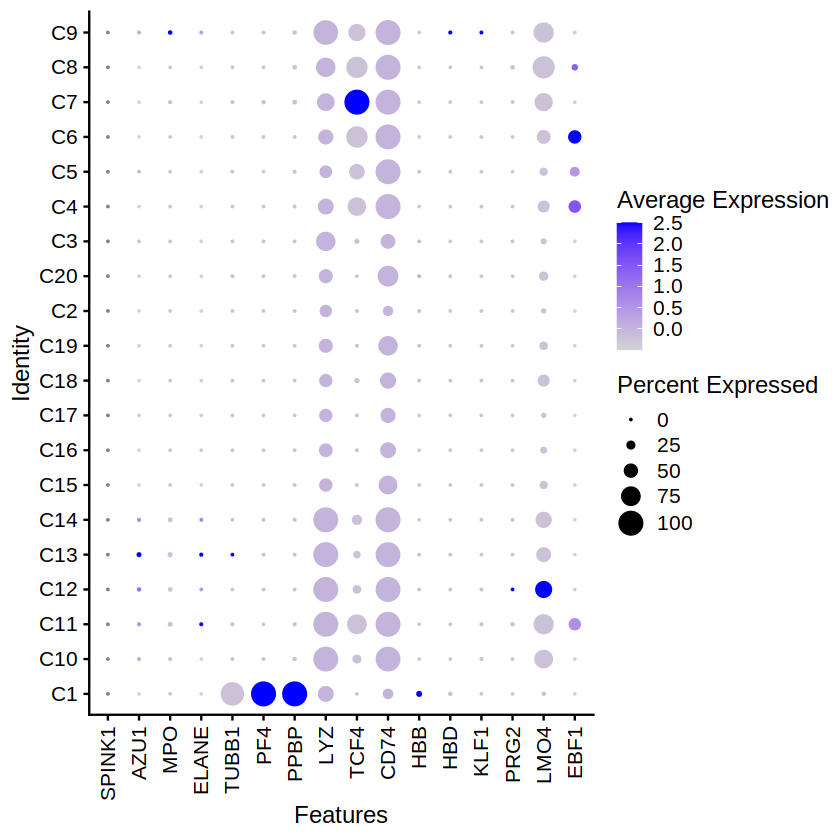

In [10]:
suppressMessages(DotPlotS(proj, features=genes, group.by="Clusters") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)))

In [11]:
proj <- suppressMessages(addTrajectory(proj, trajectory = c("C16","C17","C15", "C19", "C18"), reducedDims = "RNAIterativeLSI", force=T))

Warning message:
“Removed 5865 rows containing non-finite values (stat_summary_hex).”
Warning message:
“Removed 5865 rows containing non-finite values (stat_summary_hex).”


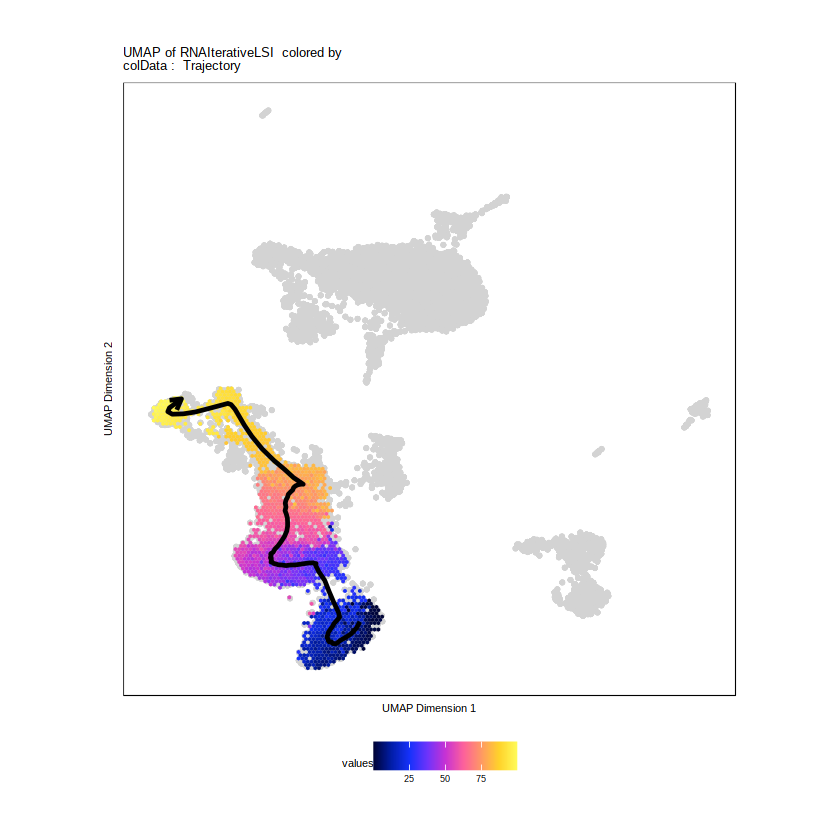

In [12]:
p3 <- suppressMessages(plotTrajectory(proj, trajectory = "Trajectory", colorBy = "cellColData", name = "Trajectory"))
p3[[1]]

In [13]:
proj <- addImputeWeights(proj, reducedDims = "RNAIterativeLSI")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-3cda573ea00af7-Date-2022-11-04_Time-22-40-26.log
If there is an issue, please report to github with logFile!

2022-11-04 22:40:26 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Warning message in sprintf("Completed Getting Magic Weights!", round(object.size(weightList)/10^9, :
“one argument not used by format 'Completed Getting Magic Weights!'”


In [14]:
traj <- getTrajectory(proj, "Trajectory", useMatrix="GeneExpressionMatrix")

Creating Trajectory Group Matrix..

Smoothing...



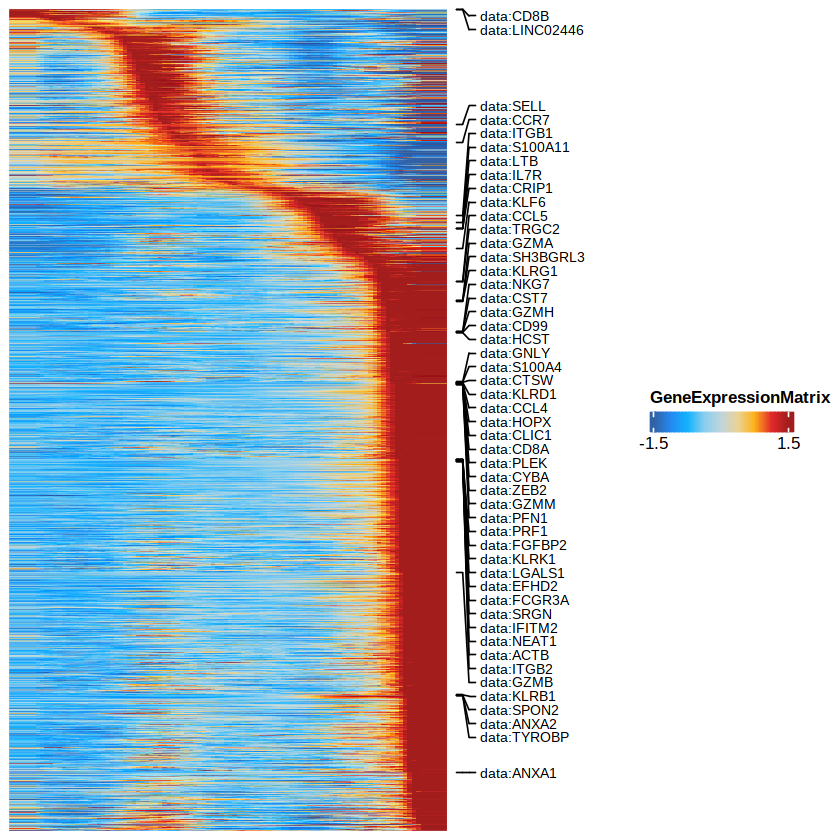

In [15]:
p4 <- suppressMessages(plotTrajectoryHeatmap(traj, pal = paletteContinuous(set = "solarExtra")))
p4

Warning message:
“Removed 5865 rows containing non-finite values (stat_summary_hex).”
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



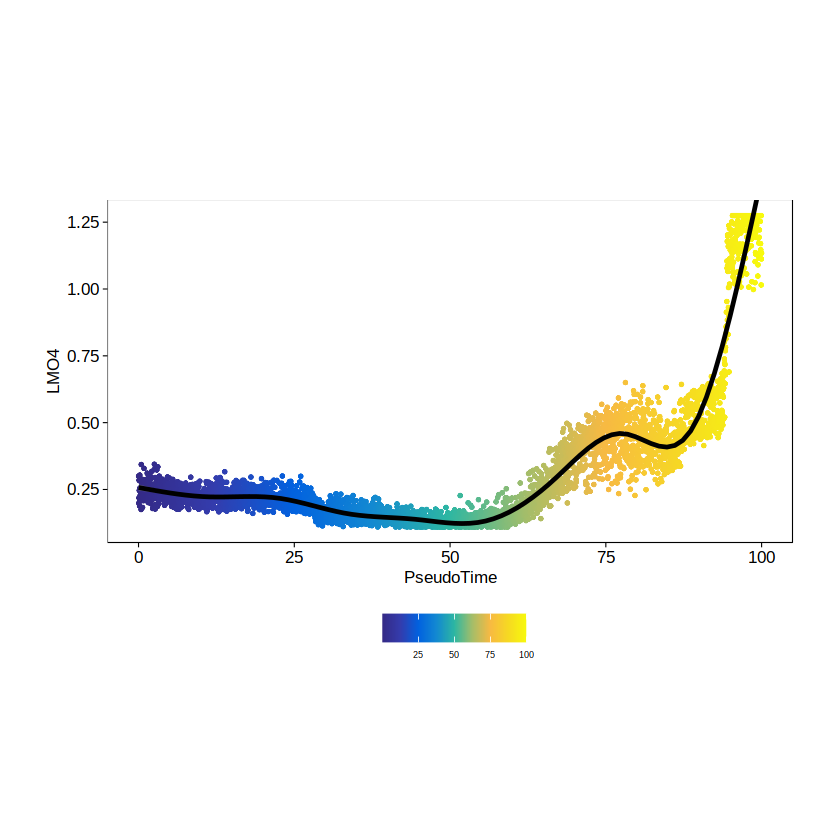

In [16]:
p5 <- suppressMessages(plotTrajectory_(proj, trajectory = "Trajectory", colorBy = "GeneExpressionMatrix", colorMatrixAssay = "data",name = "LMO4", continuousSet = "blueYellow", imputeWeights =  getImputeWeights(proj)))
p5[[2]]

In [17]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.6 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /data/sz753404/miniconda3/envs/schema/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.utf-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.utf-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] circlize_0.4.13                   ComplexHeatmap_2.11.1            
 [3] nabor_0.5.0                       sp_1.5-0                         
 [5] SeuratObject_4.1.1                Seurat_4.1.1.9001                
 [7] BSgenome.Hsapiens.UCSC.hg19_